In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import glob,os 

In [3]:
test_img ='/Face Mask Dataset/Test/WithMask/187.png'
img=cv2.imread(test_img,0)
img=cv2.resize(img,(240,240),interpolation=cv2.INTER_AREA)
img_g=cv2.GaussianBlur(img,(3,3),0,0)
img_m=cv2.medianBlur(img,3)
img_c=cv2.Canny(img_g,50,150)
print (img.dtype)
print (img.shape)
plt.figure
plt.subplot(131),plt.imshow(img,cmap='gray')
plt.subplot(132),plt.imshow(img_g,cmap='gray')
plt.subplot(133),plt.imshow(img_c,cmap='gray')


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


Train

In [4]:
X_train=[]
Y_train=[]
train_pos_path='/content/drive/MyDrive/Face Mask Dataset/Train/WithMask'
train_neg_path='/content/drive/MyDrive/Face Mask Dataset/Train/WithoutMask'

Validation

In [5]:
X_val=[]
Y_val=[]
val_pos_path='/content/drive/MyDrive/Face Mask Dataset/Validation/WithMask'
val_neg_path='/content/drive/MyDrive/Face Mask Dataset/Validation/WithoutMask'

Testing

In [6]:
X_test=[]
Y_test=[]
test_pos_path='/content/drive/MyDrive/Face Mask Dataset/Test/WithMask'
test_neg_path='/content/drive/MyDrive/Face Mask Dataset/Test/WithoutMask'

Train Positive

In [7]:
for filename in glob.glob(os.path.join(train_pos_path,"*.png")):
    fd = cv2.imread(filename,0)
    fd = cv2.resize(fd,(240,240))
    fd=cv2.GaussianBlur(fd,(3,3),0,0)
    fd = cv2.Canny(fd,50,150)
    fd=fd.flatten()
    X_train.append(fd)
    Y_train.append(1)

Train Negative 

In [8]:
for filename in glob.glob(os.path.join(train_neg_path,"*.png")):
    fd = cv2.imread(filename,0)
    fd = cv2.resize(fd,(240,240))
    fd=cv2.GaussianBlur(fd,(3,3),0,0)
    fd = cv2.Canny(fd,50,150)
    fd=fd.flatten()
    X_train.append(fd)
    Y_train.append(0)

In [9]:
X_train = np.float32(X_train)
Y_train = np.array(Y_train)

In [10]:
print(X_train)
print(X_train.shape)
print(X_train.dtype)
print(Y_train)
print(Y_train.shape) 
print(Y_train.dtype) 

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... 255.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
(8520, 57600)
float32
[1 1 1 ... 0 0 0]
(8520,)
int64


Validation Positive

In [11]:
for filename in glob.glob(os.path.join(val_pos_path,"*.png")):
    fd = cv2.imread(filename,0)
    fd = cv2.resize(fd,(240,240))
    fd=cv2.GaussianBlur(fd,(3,3),0,0)
    fd = cv2.Canny(fd,50,150)
    fd=fd.flatten()
    X_val.append(fd)
    Y_val.append(1)

Validation Negative

In [12]:
for filename in glob.glob(os.path.join(val_neg_path,"*.png")):
    fd = cv2.imread(filename,0)
    fd = cv2.resize(fd,(240,240))
    fd=cv2.GaussianBlur(fd,(3,3),0,0)
    fd = cv2.Canny(fd,50,150)
    fd=fd.flatten()
    X_val.append(fd)
    Y_val.append(0)

In [13]:
X_val = np.float32(X_val)
Y_val = np.array(Y_val)

In [14]:
print(X_val)
print(X_val.shape)
print(Y_val)
print(Y_val.shape)  

[[  0.   0.   0. ... 255.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
(720, 57600)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 

Test Positive 

In [15]:
for filename in glob.glob(os.path.join(test_pos_path,"*.png")):
    fd = cv2.imread(filename,0)
    fd = cv2.resize(fd,(240,240))
    fd=cv2.GaussianBlur(fd,(3,3),0,0)
    fd = cv2.Canny(fd,50,150)
    fd=fd.flatten()
    X_test.append(fd)
    Y_test.append(1)

Test Negative

In [16]:
for filename in glob.glob(os.path.join(test_neg_path,"*.png")):
    fd = cv2.imread(filename,0)
    fd = cv2.resize(fd,(240,240))
    fd=cv2.GaussianBlur(fd,(3,3),0,0)
    fd = cv2.Canny(fd,50,150)
    fd=fd.flatten()
    X_test.append(fd)
    Y_test.append(0)

In [17]:
X_test = np.float32(X_test)
Y_test = np.array(Y_test)

In [18]:
print(X_test)
print(X_test.shape)
print(Y_test)
print(Y_test.shape)  

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(878, 57600)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1

Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, n_jobs=1)
rf_model.fit(X_train,Y_train)


Y_pred = rf_model.predict(X_test)

In [20]:
from sklearn import metrics
from sklearn.metrics import classification_report 

print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       439
           1       0.85      0.93      0.89       439

    accuracy                           0.89       878
   macro avg       0.89      0.89      0.89       878
weighted avg       0.89      0.89      0.89       878



Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,Y_train)


Y_pred = dt_model.predict(X_test)

In [22]:
from sklearn import metrics
from sklearn.metrics import classification_report 

print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       439
           1       0.80      0.77      0.79       439

    accuracy                           0.79       878
   macro avg       0.79      0.79      0.79       878
weighted avg       0.79      0.79      0.79       878



KNeighbors Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
error = []
best_k = dict()


for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    best_k[i] = np.mean(pred_i != Y_test)
    
best_k = sorted(best_k.items(), key=lambda k: k[1])[0][0]
knn_classifier = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn_classifier.fit(X_train, Y_train)
y_pred = knn_classifier.predict(X_test)

In [24]:
best_k

1

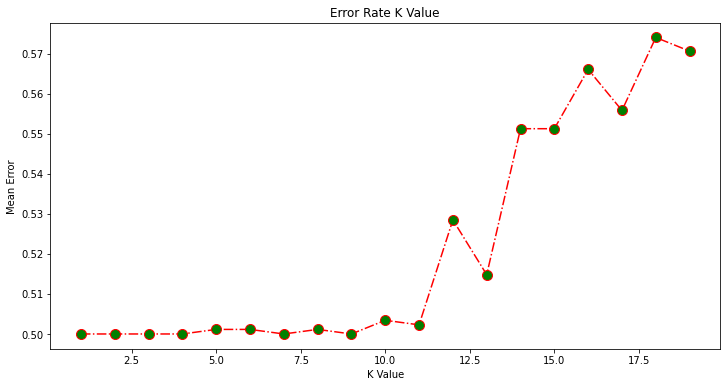

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashdot', marker='o',markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [26]:
from sklearn import metrics
from sklearn.metrics import classification_report 

print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.02      0.04       439
           1       0.50      0.98      0.66       439

    accuracy                           0.50       878
   macro avg       0.50      0.50      0.35       878
weighted avg       0.50      0.50      0.35       878



LOgistic Regression


In [27]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [28]:
Y_pred = logisticRegr.predict(X_test)

In [29]:
from sklearn import metrics
from sklearn.metrics import classification_report 

print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       439
           1       0.91      0.91      0.91       439

    accuracy                           0.91       878
   macro avg       0.91      0.91      0.91       878
weighted avg       0.91      0.91      0.91       878



In [32]:
from pypmml import Model
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn.linear_model import LogisticRegression

X, Y = logisticRegr(return_X_y=True)

pipeline = PMMLPipeline([
	("logistic_regression", LogisticRegression())
])
pipeline.fit(X_train, Y_train)

sklearn2pmml(pipeline, "logistic_regression.xml", with_repr = True)

In [33]:
import joblib
joblib.dump(logisticRegr, 'models.dat')
print('Model saved : {}'.format('models.dat'))

Model saved : models.dat
